# Phân tích dữ liệu bài đăng #

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import os

In [14]:
df = pd.read_csv('Data/daxuly.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   original_request_url           1360 non-null   object 
 1   post_url                       1360 non-null   object 
 2   post_id                        1360 non-null   object 
 3   text                           1360 non-null   object 
 4   post_text                      1360 non-null   object 
 5   time                           1360 non-null   object 
 6   image                          1006 non-null   object 
 7   image_lowquality               1354 non-null   object 
 8   images                         1289 non-null   object 
 9   images_description             1289 non-null   object 
 10  images_lowquality              1355 non-null   object 
 11  images_lowquality_description  1355 non-null   object 
 12  video                          394 non-null    o

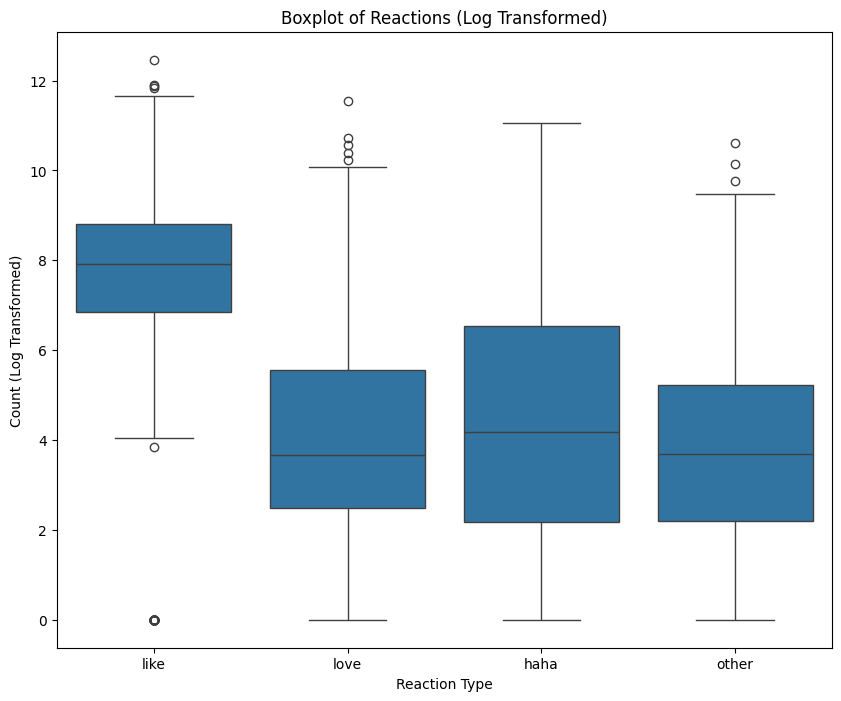

In [3]:
# Áp dụng log transformation cho các cột
df[['like', 'love', 'haha', 'other']] = np.log1p(df[['like', 'love', 'haha', 'other']])

# Chuyển đổi dữ liệu từ dạng rộng sang dạng dài
df_melted = df[['like', 'love', 'haha', 'other']].melt()

# Vẽ biểu đồ boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplot of Reactions (Log Transformed)')
plt.xlabel('Reaction Type')
plt.ylabel('Count (Log Transformed)')
plt.show()


In [4]:
# Chuyển đổi cột 'time' thành định dạng datetime
df['time'] = pd.to_datetime(df['time'])

# Lọc DataFrame để chỉ giữ lại các dòng trong tháng 10
df = df[df['time'].dt.month == 10]


In [5]:
df['hour'] = df['time'].dt.hour

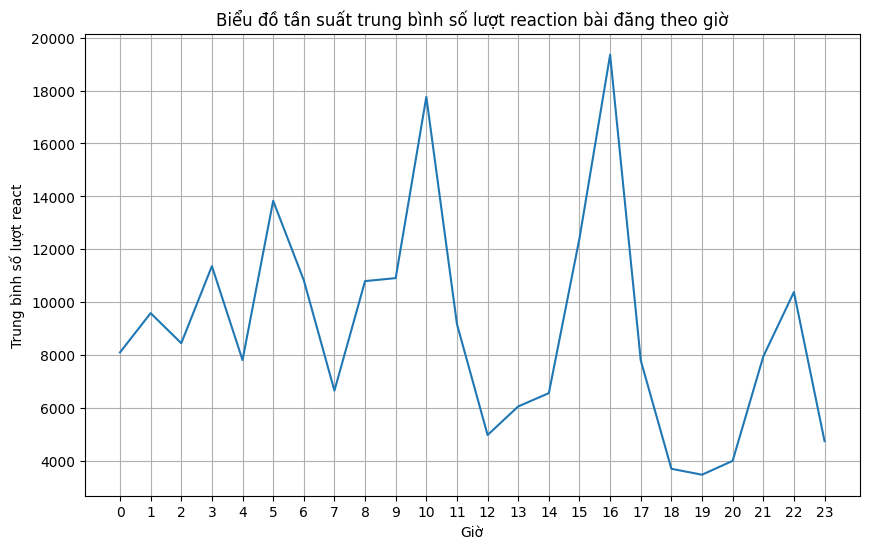

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df['hour'] = df['time'].dt.hour

# Tính trung bình số lượt reacion theo giờ
df_grouped = df.groupby('hour')['reaction_count'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.plot(df_grouped['hour'], df_grouped['reaction_count'])
plt.xticks(range(0, 24))
plt.xlabel('Giờ')
plt.ylabel('Trung bình số lượt react')
plt.title('Biểu đồ tần suất trung bình số lượt reaction bài đăng theo giờ')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd

df['time'] = pd.to_datetime(df['time'])
df['day'] = df['time'].dt.day

# Tính trung bình số lượng bài đăng theo ngày
average_posts_per_day = df.groupby('day')['post_id'].count().mean()
print(f"Trung bình số lượng bài đăng theo ngày: {average_posts_per_day}")

# Tính trung bình số lượng phản ứng theo ngày
average_reactions_per_day = df.groupby('day')['reaction_count'].mean()
# Tính trung bình số lượng phản ứng
average_reactions = average_reactions_per_day.mean()
print(f"Trung bình số lượng phản ứng trong 31 ngày: {average_reactions}")

# Tính trung bình số lượng chia sẻ theo ngày
average_shares_per_day = df.groupby('day')['shares'].mean()
average_shares = average_shares_per_day .mean()
print(f"Trung bình số lượng chia sẻ theo ngày: {average_shares}")


Trung bình số lượng bài đăng theo ngày: 43.87096774193548
Trung bình số lượng phản ứng trong 31 ngày: 8915.527560677856
Trung bình số lượng chia sẻ theo ngày: 106.80261000024451


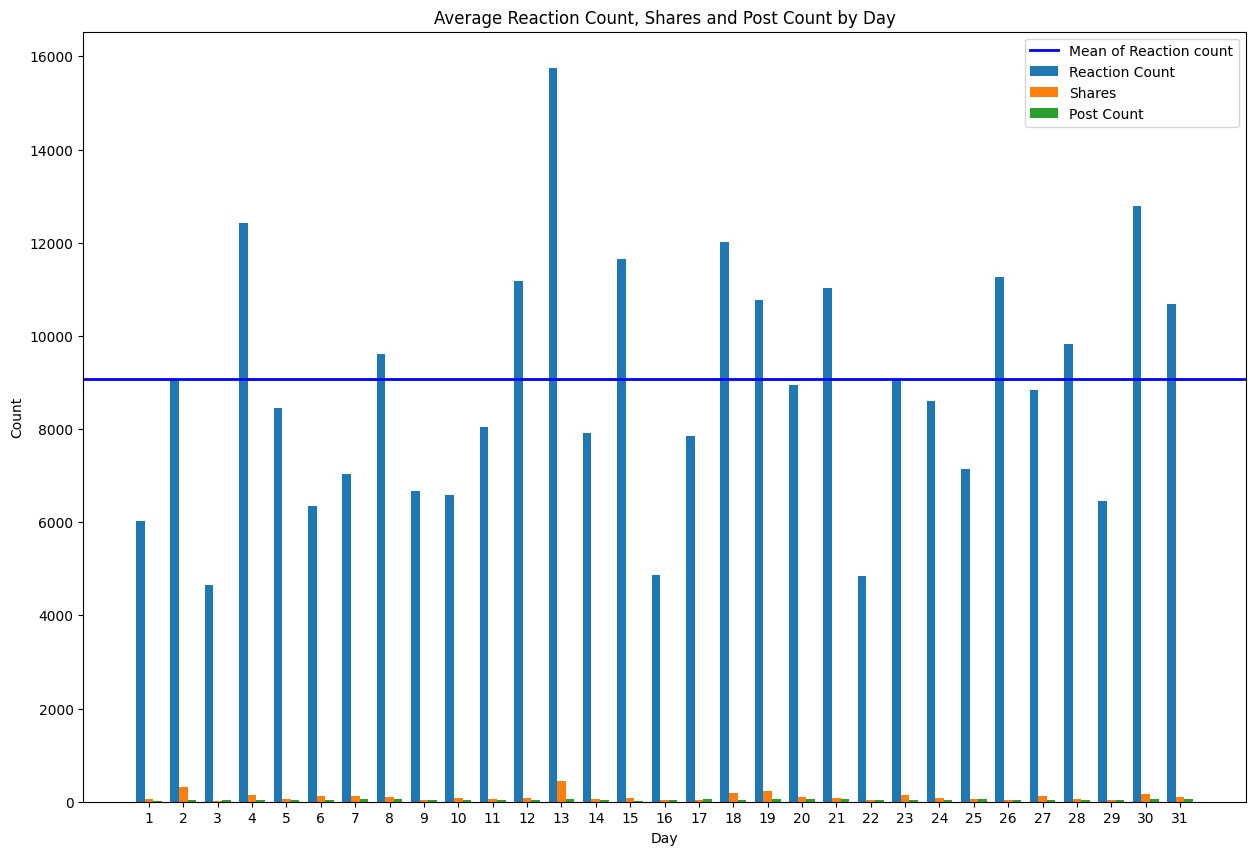

In [8]:
import matplotlib.pyplot as plt
import numpy as np

days = df['day'].unique()
reaction_counts = df.groupby('day')['reaction_count'].mean()
shares = df.groupby('day')['shares'].mean()

# Thêm cột về số lượng bài đăng
post_counts = df.groupby('day')['post_id'].count()

# Tính toán giá trị trung bình
mean_val = df['reaction_count'].mean()

# Tạo vị trí cho mỗi cột
bar_width = 0.25
index = np.arange(len(days))

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(15, 10))  # Điều chỉnh kích thước biểu đồ ở đây

bar1 = ax.bar(index, reaction_counts, bar_width, label='Reaction Count')
bar2 = ax.bar(index + bar_width, shares, bar_width, label='Shares')
bar3 = ax.bar(index + 2*bar_width, post_counts, bar_width, label='Post Count')

# Vẽ đường trung bình và trung vị
ax.axhline(mean_val, color='blue', linewidth=2, label='Mean of Reaction count')
# Thêm nhãn, tiêu đề và chú thích
ax.set_xlabel('Day')
ax.set_ylabel('Count')
ax.set_title('Average Reaction Count, Shares and Post Count by Day')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(days)
ax.legend()

plt.show()


In [9]:
# Lọc ra dataframe cho ngày 13
df_day_13 = df[df['day'] == 13]
df_day_4 = df[df['day'] == 4]
df_day_18 = df[df['day'] == 18]
df_day_21 = df[df['day'] == 21]
df_day_30 = df[df['day'] == 30]
# Tìm bài viết có lượt tương tác cao nhất
max_reaction_post_13 = df_day_13[df_day_13['reaction_count'] == df_day_13['reaction_count'].max()]
max_reaction_post_4 = df_day_4[df_day_4['reaction_count'] == df_day_4['reaction_count'].max()]
max_reaction_post_18= df_day_18[df_day_18['reaction_count'] == df_day_18['reaction_count'].max()]
max_reaction_post_21= df_day_21[df_day_21['reaction_count'] == df_day_21['reaction_count'].max()]
max_reaction_post_30= df_day_30[df_day_30['reaction_count'] == df_day_30['reaction_count'].max()]

# In ra nội dung bài viết
print(max_reaction_post_4['text'])
print(max_reaction_post_4['reaction_count'])
print(max_reaction_post_13['text'])
print(max_reaction_post_13['reaction_count'])
print(max_reaction_post_18['text'])
print(max_reaction_post_18['reaction_count'])
print(max_reaction_post_21['text'])
print(max_reaction_post_21['reaction_count'])
print(max_reaction_post_30['text'])
print(max_reaction_post_30['reaction_count'])

110    Nhìn từ xa cứ ngỡ là 1 căn biệt thự 😐
Name: text, dtype: object
110    137013
Name: reaction_count, dtype: int64
510    Cho đi rồi sẽ được nhận lại sự tử tế <3
Name: text, dtype: object
510    369489
Name: reaction_count, dtype: int64
685    Đừng biến chụp ảnh thành nỗi ám ảnh mỗi lần đi...
Name: text, dtype: object
685    124243
Name: reaction_count, dtype: int64
884    Sơn Tùng M-TP biểu diễn "Em của ngày hôm qua" ...
Name: text, dtype: object
884    196931
Name: reaction_count, dtype: int64
1272    Ấm lòng, người tốt luôn ở khắp mọi nơi 🥰
Name: text, dtype: object
1272    178616
Name: reaction_count, dtype: int64


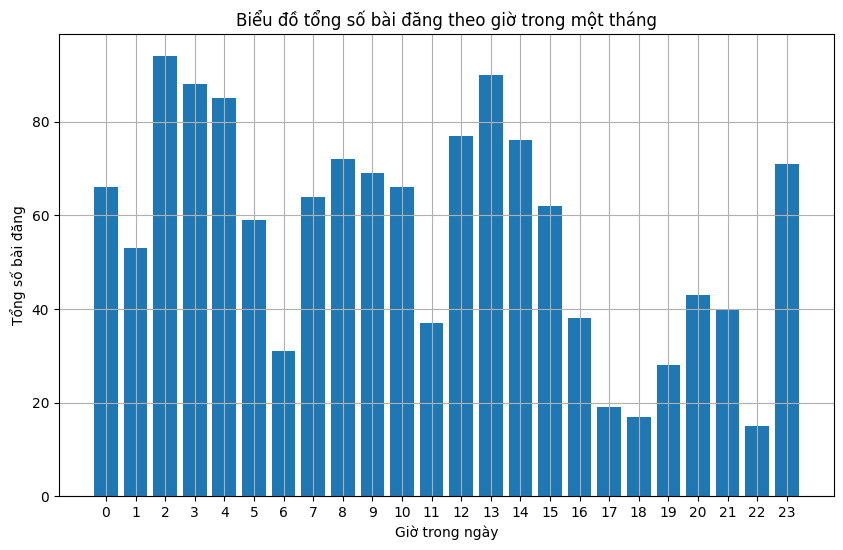

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour

# Tính tổng số bài đăng theo giờ
post_count = df['hour'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(post_count.index, post_count.values)
plt.xlabel('Giờ trong ngày')
plt.ylabel('Tổng số bài đăng')
plt.title('Biểu đồ tổng số bài đăng theo giờ trong một tháng')
plt.xticks(range(24))
plt.grid(True)
plt.show()


In [ ]:
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)
df_text = df[['post_id','post_text']]
text    = str(df_text['post_text'])

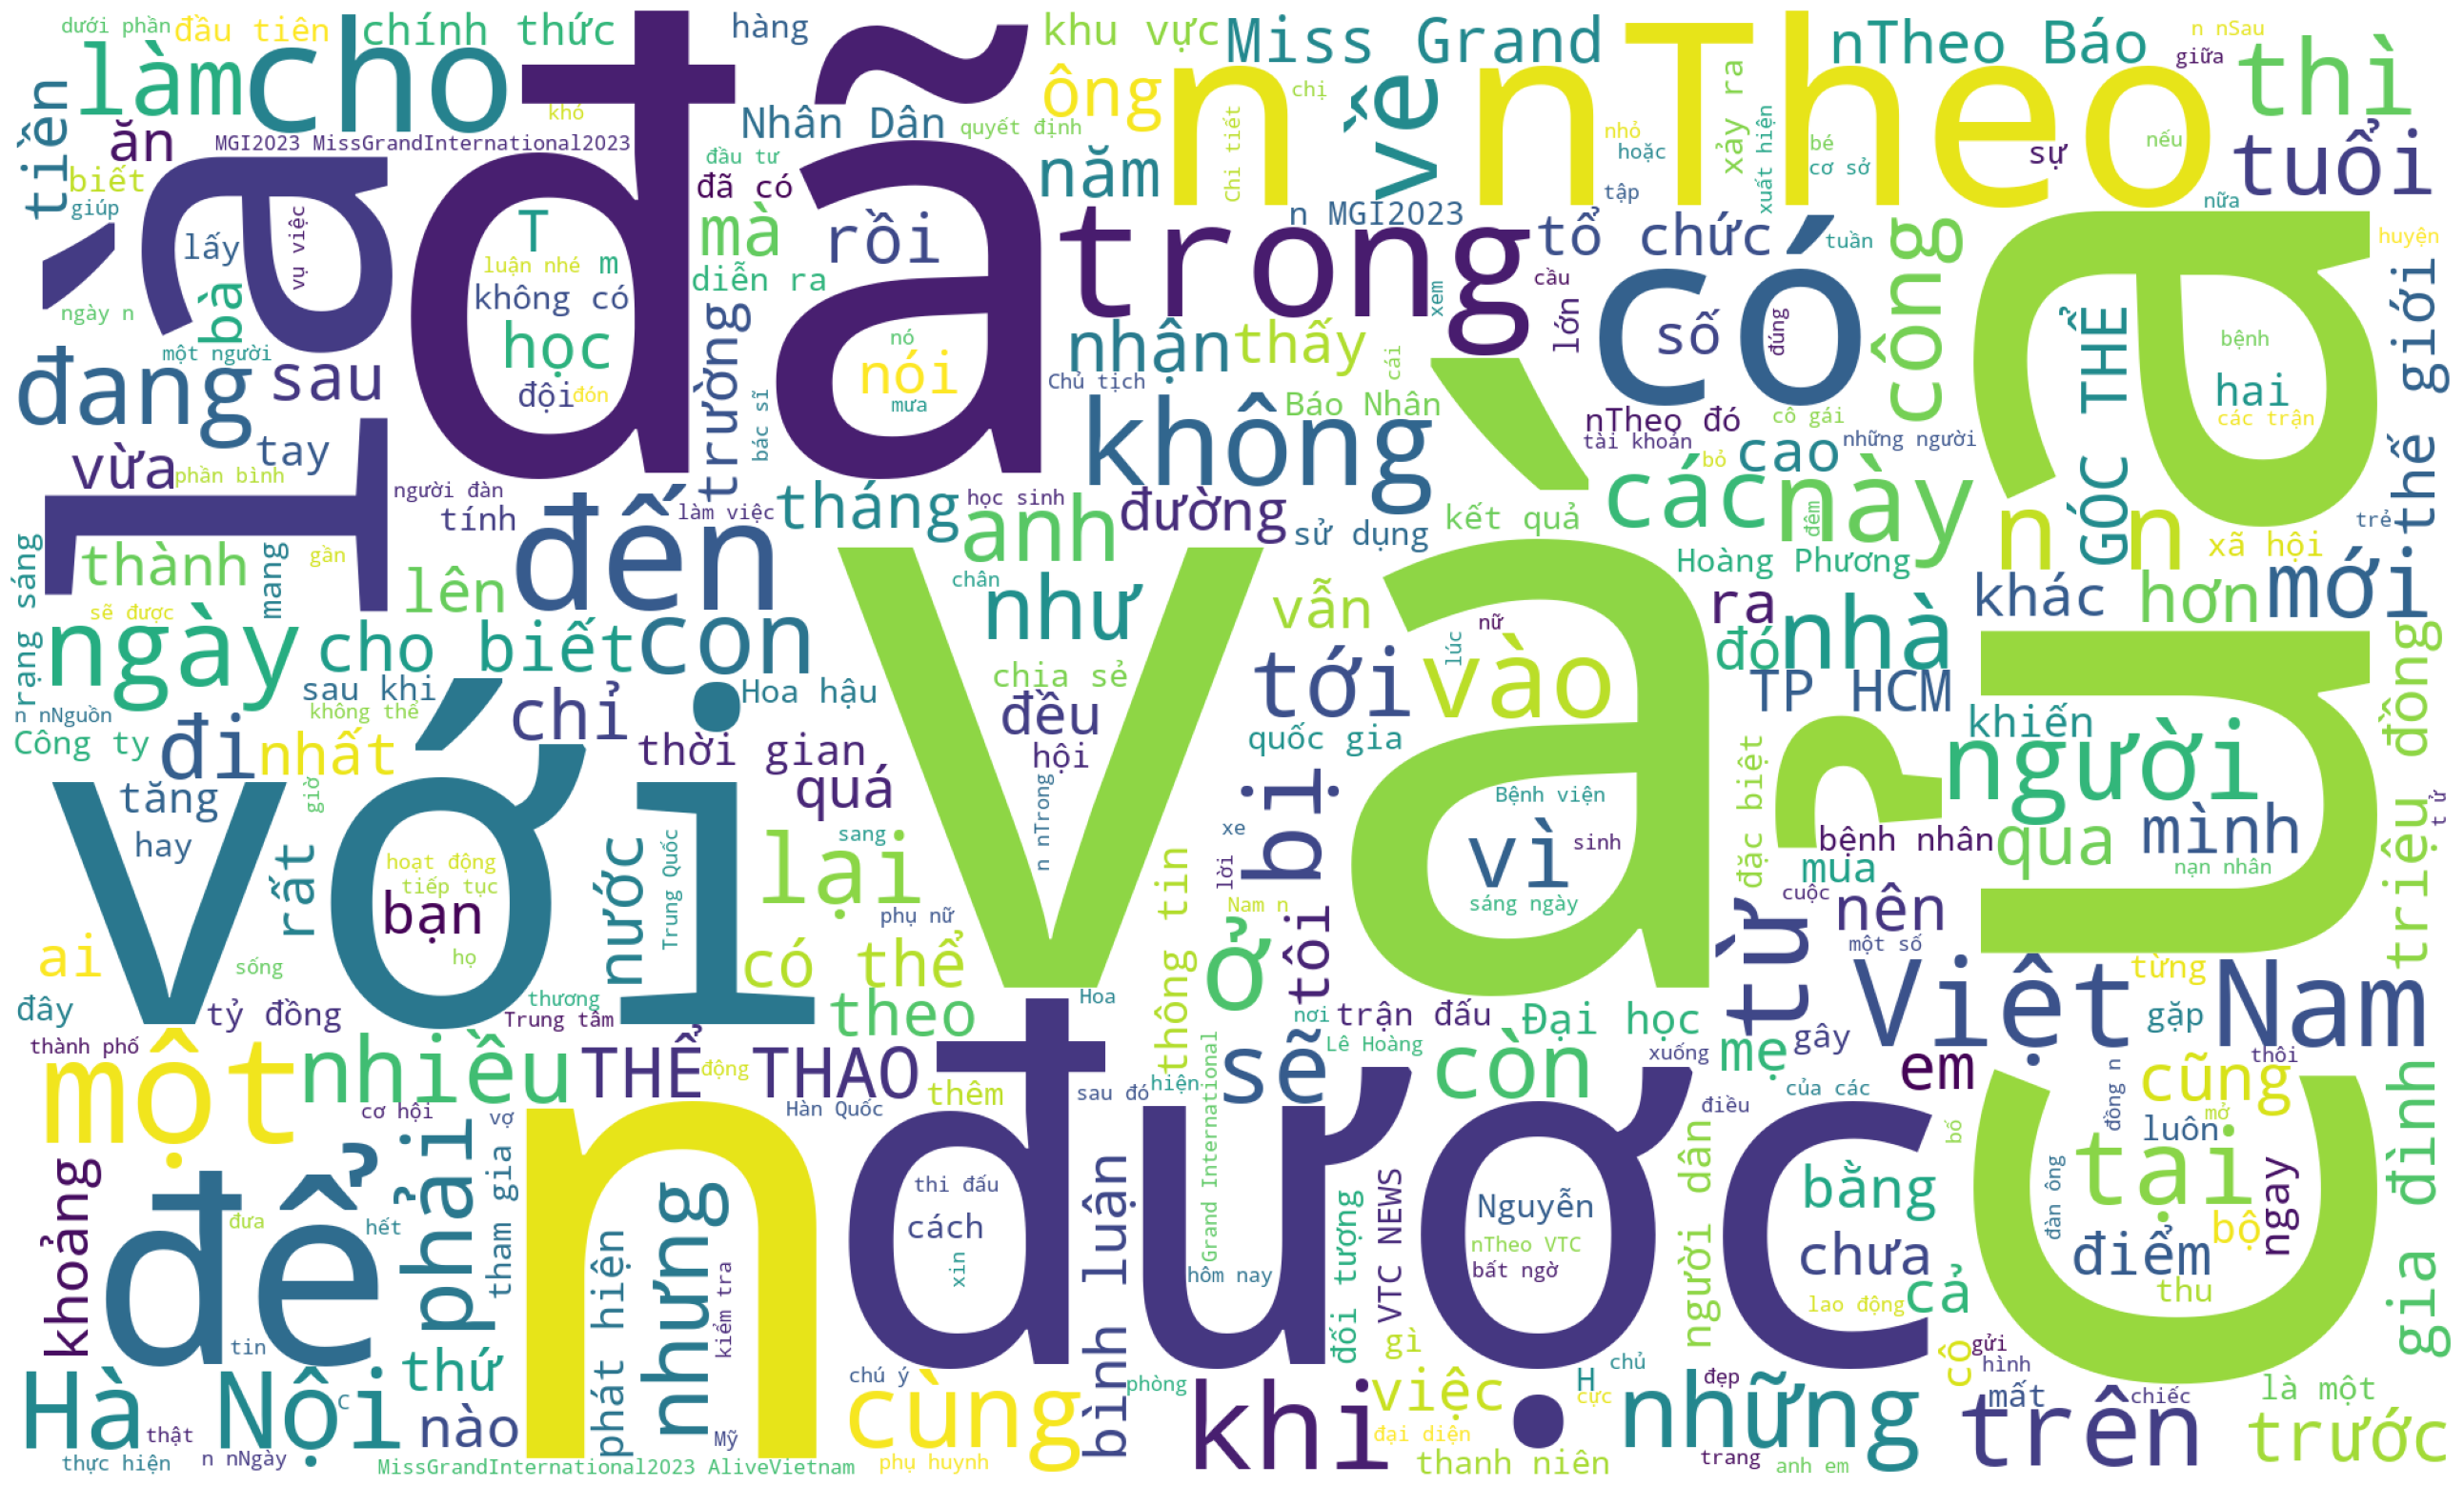

In [13]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
pd.set_option('display.max_colwidth', None)

In [9]:
import re

# Tạo một hàm để tìm tất cả các hashtag trong một chuỗi văn bản
def find_hashtags(text):
    return re.findall(r"#(\w+)", text)

# Áp dụng hàm trên cho cột 'post_text' để tìm tất cả các hashtag
df_text['hashtags'] = df_text['post_text'].apply(find_hashtags)

# Chỉ in những dòng không rỗng
import pandas as pd

# Tạo một DataFrame mới từ những dòng không rỗng trong cột 'hashtags'
df_hashtags = pd.DataFrame(df_text[df_text['hashtags'].str.len() > 0]['hashtags'])
text=str(df_hashtags['hashtags'])

df_hashtags



hashtags
18                                                                                                                                                                                                                                 [vinaphone, soundfreedombyvinaphone_haiphong]
43                                                                                                                                                           [F1H2O, duathuyenmaycongthuc1, duathuyenmay, binhdinhvietnam, grandprixofbinhdinh, quynhon, powerboat, racing, UIM]
74                                                                                                                                                                                                          [nguyenphuongnhi, missinternational, missinternationalvietnam, MIVN]
76                                                                                                                                                                                                                           [MGI2023, MissGrandInternational2023, AliveVietnam]
123                                                                                                                                                                                                                               [KidsPlaza, Festivalmebauvaembe, 15namphungsu]
125                                                                                                                                                                                                                 [OMOMatic, Datanghuong, Khoahuong48h, Khamphadatangtinhcach]
151                                                                                                                                                                                                                          [MGI2023, MissGrandInternational2023, AliveVietnam]
162                                                                                                                                                                                                                        [NguoiVoCuoiCung, VictorVu, KaityNguyen, ThuanNguyen]
205                                                                                                                                                                                                                          [MGI2023, MissGrandInternational2023, AliveVietnam]
208                                                                                                       [LeHoangPhuong, MissGrandVietnam, HoahauHoabinhVietNam, MissGrandInternational, HoahauHoabinhQuocte, WeAreGRANDThe1AndOnly, buffethaisanhanoi, buffethaisancuuvanlong]
209                                                                                                       [LeHoangPhuong, MissGrandVietnam, HoahauHoabinhVietNam, MissGrandInternational, HoahauHoabinhQuocte, WeAreGRANDThe1AndOnly, buffethaisanhanoi, buffethaisancuuvanlong]
248                                                                                                                                                                                                                          [MGI2023, MissGrandInternational2023, AliveVietnam]
251                                                                                                                                                                                                                                                     [mailisa, hoangkimkhanh]
263                                                                                                                   [denhatmuusinh, DNMS, GoldenScreen, GoldenCommunicationGroup, HuyKhanh, DuyKhanh, DiepBaoNgoc, QuocKhanh, HaiDangDoo, JunnD, TrangHy, ninhthuan, TheAnh28]
290                                                                                                                                                                      

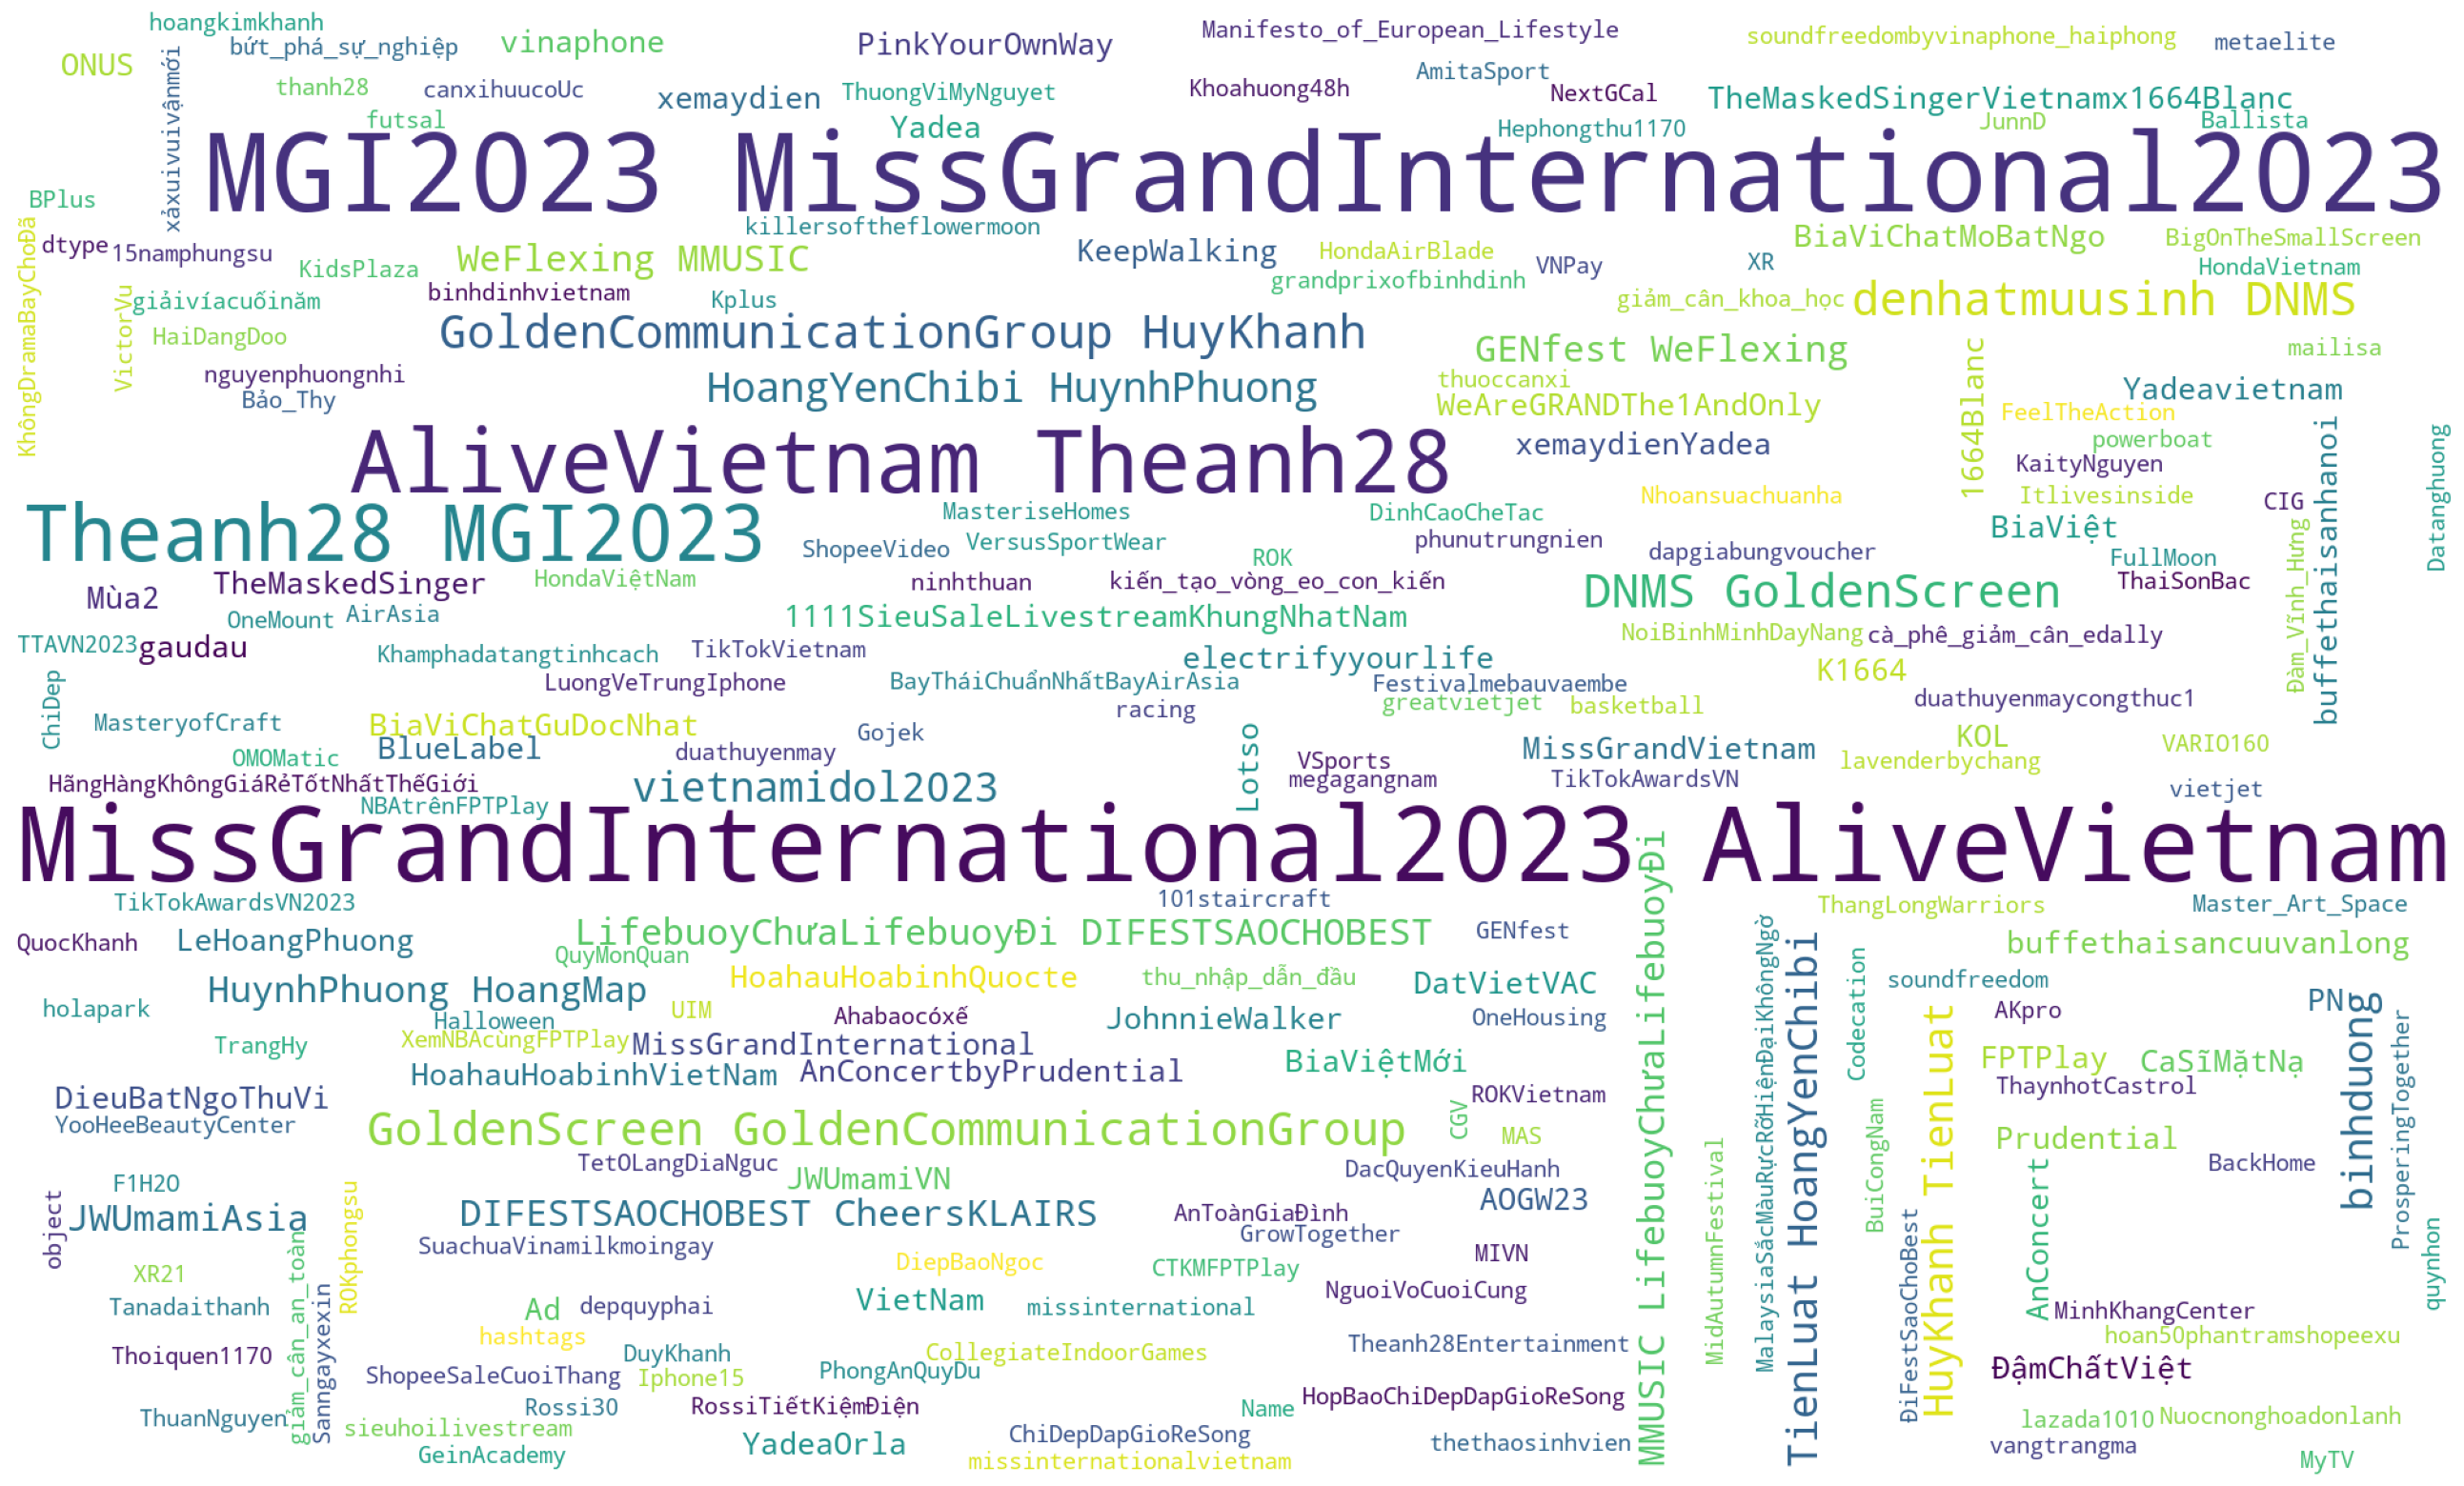

In [10]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
